# Decision Tree

In [64]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

## Classifiation

### Simple Dataset

In [26]:
data = {
    "Age": [23, 25, 27, 29, 29],
    "Likes English": [0, 1, 1, 0, 0],
    "Likes Ai": [0, 1, 0, 1, 0],
    "Raise Salary": [0, 0, 1, 1, 0]
}

df = pd.DataFrame(data)
df

,Age,Likes English,Likes Ai,Raise Salary
0,23,0,0,0
1,25,1,1,0
2,27,1,0,1
3,29,0,1,1
4,29,0,0,0


Get value and convert to numpy

In [27]:
X = df[["Age", "Likes English", "Likes Ai"]].values
y = df[["Raise Salary"]].values.reshape(-1,)

#### Gini

Train

In [28]:
# Define Classifier
clf = DecisionTreeClassifier()

# Train
clf = clf.fit(X, y)

Predict

In [29]:
x_test = np.array([[27, 0, 1]])
predicted_label = clf.predict(x_test)
predicted_label

array([1], dtype=int64)

Visualization

[Text(0.4, 0.875, 'Age <= 26.0\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'Likes Ai <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'Likes English <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

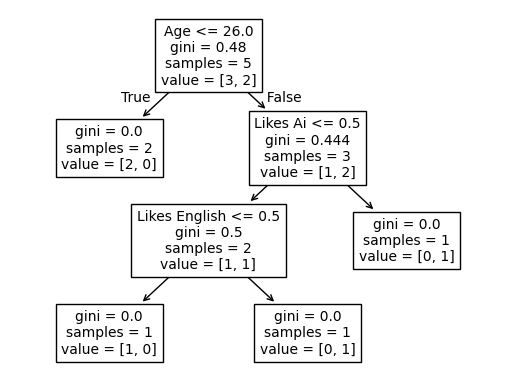

In [30]:
plot_tree(clf, feature_names=["Age", "Likes English", "Likes Ai"], fontsize=10)

#### Information Gain

Train

In [32]:
# Define Classifier
clf = DecisionTreeClassifier(criterion="entropy")

# Train
clf = clf.fit(X, y)

Predict

In [34]:
x_test = np.array([[27, 0, 1]])
predicted_label = clf.predict(x_test)
predicted_label

array([1], dtype=int64)

Visualization

[Text(0.4, 0.875, 'Age <= 26.0\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'Likes English <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'Likes AI <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

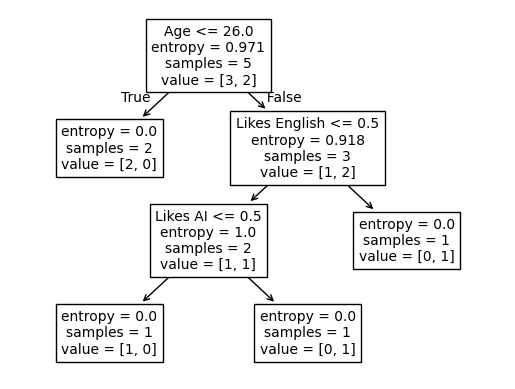

In [35]:
plot_tree(clf, feature_names=["Age", "Likes English", "Likes AI"], fontsize=10)

### IRIS Dataset

Load dataset

In [38]:
iris_X, iris_y = datasets.load_iris(return_X_y=True)

In [42]:
iris_X[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [40]:
iris_y[:2]

array([0, 0])

Split train:test = 8:2

In [43]:
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.2, random_state=42)

Defining an object for DTC and fitting for whole dataset

In [44]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

Predict

In [46]:
y_pred = dt_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

Visualization

[Text(0.3076923076923077, 0.9285714285714286, 'Petal_Width <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'Petal_Length <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'Petal_Width <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'Petal_Width <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'Petal_Length <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gin

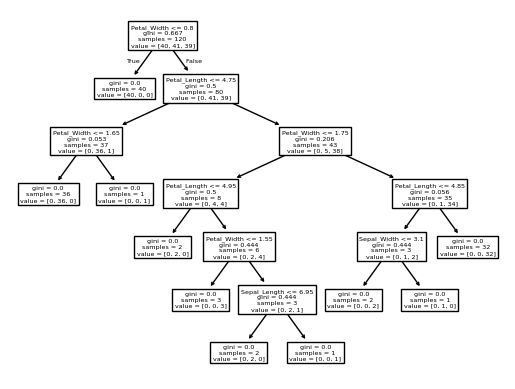

In [48]:
plot_tree(dt_classifier, feature_names=["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"])

## Regression

### Sum of Squared Error

In [70]:
data = {
    "Age": [23, 25, 27, 29, 29],
    "Likes English": [0, 1, 1, 0, 0],
    "Likes Ai": [0, 1, 0, 1, 0],
    "Raise Salary": [0, 0, 1, 1, 0]
}

df = pd.DataFrame(data)
df

,Age,Likes English,Likes Ai,Raise Salary
0,23,0,0,0
1,25,1,1,0
2,27,1,0,1
3,29,0,1,1
4,29,0,0,0


Get value and convert to numpy

In [51]:
X = df[["Age", "Likes English", "Likes Ai"]].values
y = df[["Raise Salary"]].values.reshape(-1,)

Train

In [52]:
# Define Regressor
reg = DecisionTreeRegressor()

# Train
reg = reg.fit(X, y)

Visualization

[Text(0.4, 0.875, 'Age <= 26.0\nsquared_error = 0.24\nsamples = 5\nvalue = 0.4'),
 Text(0.2, 0.625, 'squared_error = 0.0\nsamples = 2\nvalue = 0.0'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'Likes English <= 0.5\nsquared_error = 0.222\nsamples = 3\nvalue = 0.667'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'Likes Ai <= 0.5\nsquared_error = 0.25\nsamples = 2\nvalue = 0.5'),
 Text(0.2, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(0.6, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.8, 0.375, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0')]

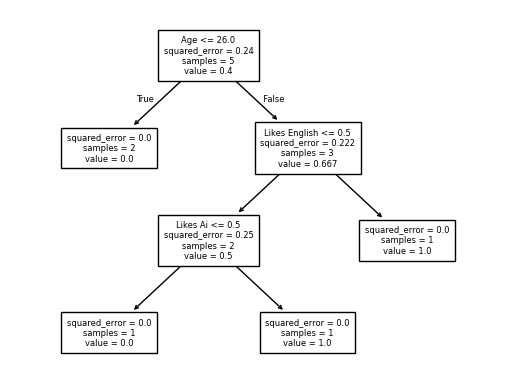

In [53]:
plot_tree(reg, feature_names=["Age", "Likes English", "Likes Ai"], fontsize=6)

### CPU Machine Dataset

In [ ]:
machine_cpu = datasets.fetch_openml(name="machine_cpu")

In [55]:
print(machine_cpu.DESCR)

**Author**:   
**Source**: Unknown -   
**Please cite**:   

The problem concerns Relative CPU Performance Data. More information can be obtained in the UCI Machine
 Learning repository (http://www.ics.uci.edu/~mlearn/MLSummary.html).
 The used attributes are :
 MYCT: machine cycle time in nanoseconds (integer)
 MMIN: minimum main memory in kilobytes (integer)
 MMAX: maximum main memory in kilobytes (integer)
 CACH: cache memory in kilobytes (integer)
 CHMIN: minimum channels in units (integer)
 CHMAX: maximum channels in units (integer)
 PRP: published relative performance (integer) (target variable)
 
 Original source: UCI machine learning repository. 
 Source: collection of regression datasets by Luis Torgo (ltorgo@ncc.up.pt) at
 http://www.ncc.up.pt/~ltorgo/Regression/DataSets.html
 Characteristics: 209 cases; 6 continuous variables

Downloaded from openml.org.


In [57]:
machine_cpu.frame

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,class
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132
...,...,...,...,...,...,...,...
204,124,1000,8000,0,1,8,42
205,98,1000,8000,32,2,8,46
206,125,2000,8000,0,2,14,52
207,480,512,8000,32,0,0,67


Load dataset

In [58]:
machine_data = machine_cpu.data
machine_labels = machine_cpu.target

Split train:test = 8:2

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    machine_data, 
    machine_labels, 
    test_size=0.2, 
    random_state=20
)

Train

In [60]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

Predict

In [68]:
y_pred = tree_reg.predict(X_test)
mean_squared_error(y_test, y_pred)

Visualization

[Text(0.4, 0.875, 'MYCT <= 26.0\nsquared_error = 0.24\nsamples = 5\nvalue = 0.4'),
 Text(0.2, 0.625, 'squared_error = 0.0\nsamples = 2\nvalue = 0.0'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'MMIN <= 0.5\nsquared_error = 0.222\nsamples = 3\nvalue = 0.667'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'MMAX <= 0.5\nsquared_error = 0.25\nsamples = 2\nvalue = 0.5'),
 Text(0.2, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(0.6, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.8, 0.375, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0')]

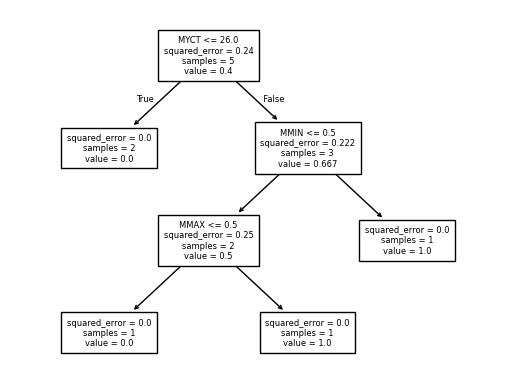

In [67]:
plot_tree(reg, feature_names=['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX'], fontsize=6)